
# Supervised Learning Flow — Breast Cancer (Wisconsin)


## Part 1 — Introduction 

In [251]:

# === Student details  ===
# Student details 1: Yair K. 5911
# Student details 2: Maya S. 7637



### Prompts / AI usage (if any)
Paste here any prompts you used (ChatGPT / LLM), links to references, and a short explanation of how you used them.



### Problem & Dataset — short summary
We tackle a binary classification task using the Breast Cancer Wisconsin (Diagnostic) dataset.

- **Samples & Features**: 569 samples; 30 numeric features = 10 base properties × {mean, SE, worst}.

- **Feature families**: radius, texture, perimeter, area, smoothness, compactness, concavity, concave points, symmetry, fractal dimension.

- **Target label**: Malignant (1) vs Benign (0) (often given as diagnosis = M/B or target = 1/0).

- **Data quality**: No missing values; mild class imbalance (~63% Benign / 37% Malignant).

- **Assignment goal**: Build an end-to-end supervised-learning workflow—data loading, EDA, preprocessing/feature engineering, 5-fold CV + grid search for model selection, and final test evaluation (F1 on the malignant class).



## Part 2 — Data Loading & EDA 


In this section we:
- Loaded train/test
- mapped the target to Malignant=1 and Benign=0, and ran initial EDA: class balance, histograms/boxplots for key features, and a correlation heatmap on a feature subset.



In [190]:
import pandas as pd

train_df = pd.read_csv("cancer_train.csv")
test_df  = pd.read_csv("cancer_test.csv")

display(train_df.head())  # 5 first rows (train)
display(test_df.head())   # 5 first rows (test)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,13.170,18.66,85.98,534.6,0.11580,0.12310,0.12260,0.07340,0.2128,0.06777,...,27.95,102.80,759.4,0.1786,0.4166,0.5006,0.20880,0.3900,0.11790,0
1,9.667,18.49,61.49,289.1,0.08946,0.06258,0.02948,0.01514,0.2238,0.06413,...,25.62,70.88,385.2,0.1234,0.1542,0.1277,0.06560,0.3174,0.08524,1
2,20.090,23.86,134.70,1247.0,0.10800,0.18380,0.22830,0.12800,0.2249,0.07469,...,29.43,158.80,1696.0,0.1347,0.3391,0.4932,0.19230,0.3294,0.09469,0
3,8.950,15.76,58.74,245.2,0.09462,0.12430,0.09263,0.02308,0.1305,0.07163,...,17.07,63.34,270.0,0.1179,0.1879,0.1544,0.03846,0.1652,0.07722,1
4,18.030,16.85,117.50,990.0,0.08947,0.12320,0.10900,0.06254,0.1720,0.05780,...,22.02,133.30,1292.0,0.1263,0.2666,0.4290,0.15350,0.2842,0.08225,0


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,16.170,16.07,106.30,788.5,0.09880,0.14380,0.06651,0.053970,0.1990,0.06572,...,19.14,113.10,861.5,0.1235,0.2550,0.2114,0.12510,0.3153,0.08960,1
1,14.580,13.66,94.29,658.8,0.09832,0.08918,0.08222,0.043490,0.1739,0.05640,...,17.24,108.50,862.0,0.1223,0.1928,0.2492,0.09186,0.2626,0.07048,1
2,18.820,21.97,123.70,1110.0,0.10180,0.13890,0.15940,0.087440,0.1943,0.06132,...,30.93,145.30,1603.0,0.1390,0.3463,0.3912,0.17080,0.3007,0.08314,0
3,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503,...,21.96,57.26,242.2,0.1297,0.1357,0.0688,0.02564,0.3105,0.07409,1
4,12.940,16.17,83.18,507.6,0.09879,0.08836,0.03296,0.023900,0.1735,0.06200,...,23.02,89.69,580.9,0.1172,0.1958,0.1810,0.08388,0.3297,0.07834,1


In [191]:

# === Basic EDA ===
print("Train .info():")
display(train_df.info())

print("\nTrain describe():")
display(train_df.describe(include="all"))


Train .info():
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455 entries, 0 to 454
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              455 non-null    float64
 1   mean texture             455 non-null    float64
 2   mean perimeter           455 non-null    float64
 3   mean area                455 non-null    float64
 4   mean smoothness          455 non-null    float64
 5   mean compactness         455 non-null    float64
 6   mean concavity           455 non-null    float64
 7   mean concave points      455 non-null    float64
 8   mean symmetry            455 non-null    float64
 9   mean fractal dimension   455 non-null    float64
 10  radius error             455 non-null    float64
 11  texture error            455 non-null    float64
 12  perimeter error          455 non-null    float64
 13  area error               455 non-null    float64
 14  smoothness 

None


Train describe():


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,...,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000
mean,14.257910,19.482835,92.876220,668.580440,0.096224,0.105452,0.090853,0.050013,0.181970,0.062671,...,25.905626,108.558462,903.095165,0.132501,0.257053,0.276415,0.116064,0.290950,0.083924,0.608791
std,3.613344,4.261633,24.922646,364.587131,0.013793,0.053892,0.081118,0.039727,0.027895,0.006930,...,6.149887,34.615237,594.101449,0.022603,0.159287,0.208508,0.065882,0.061539,0.018236,0.488558
min,6.981000,10.380000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.116700,0.049960,...,12.490000,50.410000,185.200000,0.081250,0.034320,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.725000,16.390000,75.265000,422.300000,0.086210,0.065600,0.029700,0.020610,0.162000,0.057660,...,21.355000,84.405000,516.450000,0.116200,0.147750,0.115450,0.065280,0.251000,0.071250,0.000000
50%,13.460000,19.020000,87.160000,559.200000,0.095090,0.094530,0.063350,0.033340,0.179400,0.061400,...,25.500000,97.670000,697.700000,0.131200,0.216700,0.232200,0.101200,0.282200,0.079480,1.000000
75%,16.150000,21.960000,106.850000,807.450000,0.105000,0.130150,0.134150,0.077440,0.195950,0.066180,...,30.285000,127.750000,1151.500000,0.146400,0.341600,0.385300,0.161950,0.319600,0.092130,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.144700,0.345400,0.426800,0.201200,0.304000,0.095750,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.170000,0.291000,0.577400,0.207500,1.000000


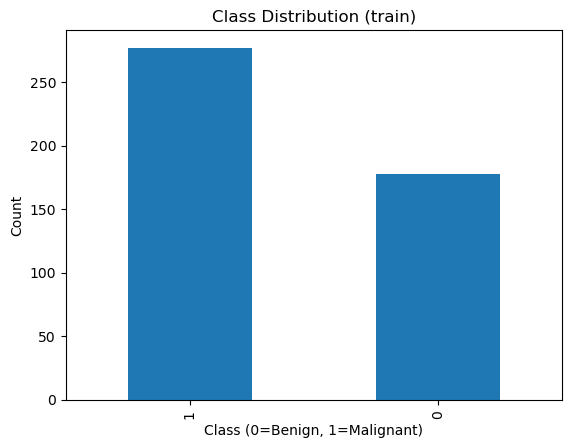

Interpretation: mild imbalance (~63% Benign / ~37% Malignant). F1(positive=Malignant) is appropriate.


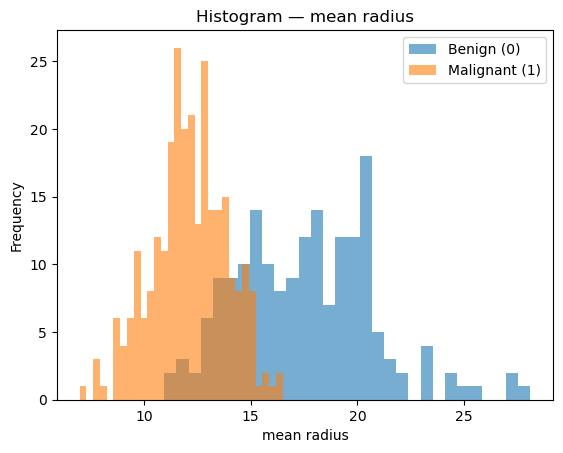

Interpretation: mean radius tends to be higher in malignant cases → useful separation.


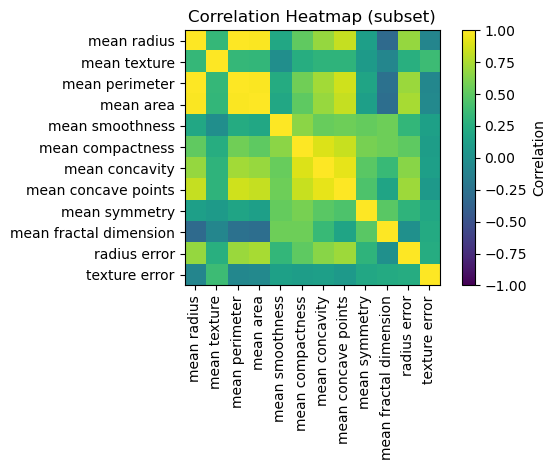

Interpretation: strong correlations among geometric features (radius–perimeter–area) → consider feature selection/PCA.


<Figure size 640x480 with 0 Axes>

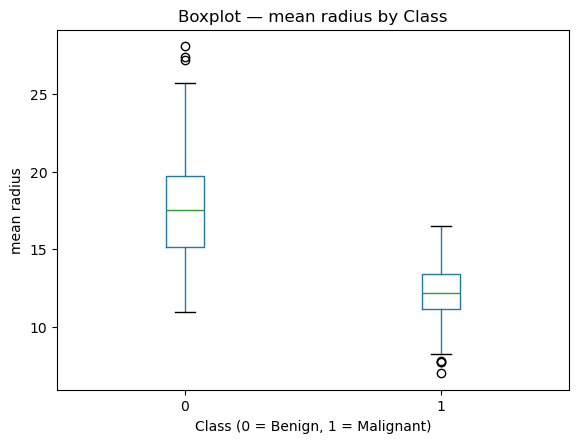

Interpretation: mean radius tends to be higher and/or more spread in malignant cases, indicating useful separation.


In [192]:
# === Visualizations  ===
import matplotlib.pyplot as plt

# --- Target mapping 1=Malignant, 0=Benign ---
if "target_malignant" in train_df.columns:
    target_col = "target_malignant"
elif "diagnosis" in train_df.columns:
    train_df["target_malignant"] = train_df["diagnosis"].map({"M":1,"B":0,"Malignant":1,"Benign":0})
    target_col = "target_malignant"
else:
    target_col = "target"  

feature_cols = [c for c in train_df.columns if c != target_col]

# 1) Class distribution
train_df[target_col].value_counts().plot(kind="bar", title="Class Distribution (train)")
plt.xlabel("Class (0=Benign, 1=Malignant)"); plt.ylabel("Count"); plt.show()
print("Interpretation: mild imbalance (~63% Benign / ~37% Malignant). F1(positive=Malignant) is appropriate.")

# 2) Histogram for a key feature
feat = "mean radius" if "mean radius" in feature_cols else feature_cols[0]
train_df[train_df[target_col]==0][feat].plot(kind="hist", bins=30, alpha=0.6, label="Benign (0)")
train_df[train_df[target_col]==1][feat].plot(kind="hist", bins=30, alpha=0.6, label="Malignant (1)")
plt.title(f"Histogram — {feat}"); plt.xlabel(feat); plt.ylabel("Frequency"); plt.legend(); plt.show()
print(f"Interpretation: {feat} tends to be higher in malignant cases → useful separation.")

# 3) Correlation heatmap (subset)
sub = feature_cols[:12]
if len(sub) >= 2:
    import numpy as np
    corr = train_df[sub].corr()
    plt.imshow(corr, vmin=-1, vmax=1); plt.title("Correlation Heatmap (subset)")
    plt.colorbar(label="Correlation")
    plt.xticks(range(len(sub)), sub, rotation=90); plt.yticks(range(len(sub)), sub)
    plt.tight_layout(); plt.show()
    print("Interpretation: strong correlations among geometric features (radius–perimeter–area) → consider feature selection/PCA.")

# 4) Descriptive table
train_df.describe().T

# 5) BOXPLOT
feat = "mean radius" if "mean radius" in feature_cols else feature_cols[0]

plt.figure()
train_df[[feat, target_col]].boxplot(by=target_col, column=[feat], grid=False)
plt.title(f"Boxplot — {feat} by Class")
plt.suptitle("")  # להסתיר כותרת כפולה של pandas
plt.xlabel("Class (0 = Benign, 1 = Malignant)")
plt.ylabel(feat)
plt.show()

print(f"Interpretation: {feat} tends to be higher and/or more spread in malignant cases, indicating useful separation.")


## EDA Summary
- Classes are mildly imbalanced (~63% Benign / ~37% Malignant).
- Features such as mean radius and worst concave points show visible separation between classes. 
- There are strong correlations among geometric features (radius–perimeter–area), indicating potential redundancy.
- **Implications**: Use F1 (positive=Malignant) as the primary metric, apply scaling (Standard/MinMax) within a Pipeline, and consider feature selection/PCA or regularization to address multicollinearity.
- **Candidate models**: Logistic Regression (baseline), SVM - RBF, Random Forest.

## Part 3 — Experiments 

### 3.0 What we’re about to do (short overview)

Set the quality metric according to task type. 
- Here it’s binary classification with a primary/positive class → we use F1 on the positive class (Malignant = 1) for model selection and for reporting.

- Perform Feature Engineering: compare no scaling, StandardScaler, MinMaxScaler, and add SelectKBest (ANOVA F and Mutual Information) to explicitly satisfy the rubric.

- Try multiple models & hyperparameters: Logistic Regression, Random Forest, SVM (RBF)—each with ≥2 hyperparameters × 2 values.

- Run a GridSearchCV with Stratified 5-Fold CV: evaluate every permutation, report the mean F1 across folds for each one, show a full results table, and highlight the winner.

- Keep the best_model for Part 4 (retrain on the full train set) and print per-fold scores for the winning setup.

## 3.1 Quality metric
### 3.1.1 Binary classification with a primary class 

In [249]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import make_scorer, f1_score

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
f1_positive = make_scorer(f1_score, pos_label=1)  # Malignant = 1 (positive)

### 3.2 Feature Engineering (scaling + selection)

We compare:

- No scaling (passthrough)

- StandardScaler

- MinMaxScaler

- SelectKBest with ANOVA F or Mutual Information (k = 10/15/20)



### 3.3 Models & hyperparameters

- **Logistic Regression**: C ∈ {0.1, 1, 10}, class_weight ∈ {None, 'balanced'}

- **Random Forest**: n_estimators ∈ {100, 200}, max_depth ∈ {None, 10}

- **SVM (RBF)**: C ∈ {0.5, 2}, gamma ∈ {'scale', 'auto'}, (optional) class_weight ∈ {None,'balanced'}

### 3.4 Define X/y (aligned with Part 2 names)



In [201]:
# === 3.4 Define features & target ===
feature_cols = [c for c in train_df.columns if c != target_col]

X_train = train_df[feature_cols]
y_train = train_df[target_col]

X_test  = test_df[feature_cols]
y_test  = test_df[target_col]

print("X_train:", X_train.shape, "| y_train:", y_train.shape)
print("X_test :", X_test.shape,  "| y_test :", y_test.shape)


X_train: (455, 30) | y_train: (455,)
X_test : (114, 30) | y_test : (114,)


### 3.5 Grid Search with 5-Fold CV (evaluate all permutations)



In [203]:
# === 3.5 GridSearchCV (5-fold) with Feature Engineering + Models ===
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import pandas as pd

# Generic pipeline: scaler -> selector -> classifier
pipe = Pipeline(steps=[
    ("scaler", "passthrough"),
    ("selector", "passthrough"),
    ("clf", LogisticRegression(max_iter=2000, solver="liblinear"))
])

param_grid = [
    # Logistic Regression
    {
        "scaler":   ["passthrough", StandardScaler(), MinMaxScaler()],
        "selector": ["passthrough",
                     SelectKBest(score_func=f_classif, k=10),
                     SelectKBest(score_func=mutual_info_classif, k=10)],
        "clf":      [LogisticRegression(max_iter=2000, solver="liblinear")],
        "clf__C":   [0.1, 1, 10],
        "clf__class_weight": [None, "balanced"],
    },
    # Random Forest (doesn't require scaling; kept for grid structure consistency)
    {
        "scaler":   ["passthrough", StandardScaler()],
        "selector": ["passthrough",
                     SelectKBest(score_func=f_classif, k=20),
                     SelectKBest(score_func=mutual_info_classif, k=20)],
        "clf":      [RandomForestClassifier(random_state=42)],
        "clf__n_estimators": [100, 200],
        "clf__max_depth":    [None, 10],
    },
    # SVM (RBF) — scaling is important
    {
        "scaler":   [StandardScaler(), MinMaxScaler()],
        "selector": ["passthrough", SelectKBest(score_func=f_classif, k=15)],
        "clf":      [SVC(kernel="rbf")],
        "clf__C":   [0.5, 2],
        "clf__gamma": ["scale", "auto"],
        "clf__class_weight": [None, "balanced"],
    },
]

# Sanity check: number of configurations (informative only)
total = 0
for g in param_grid:
    a = len(g.get("scaler",[])) or 1
    b = len(g.get("selector",[])) or 1
    c = len(g.get("clf",[])) or 1
    d = len(g.get("clf__C",[])) or 1
    e = len(g.get("clf__class_weight",[])) or 1
    f = len(g.get("clf__n_estimators",[])) or 1
    h = len(g.get("clf__max_depth",[])) or 1
    k = len(g.get("clf__gamma",[])) or 1
    total += a*b*c*d*e*f*h*k
print("Approx. total configurations:", total)

RUN_GRID_SEARCH = True  # toggle as needed
best_model = None
results_df = None

if RUN_GRID_SEARCH:
    grid = GridSearchCV(
        estimator=pipe,
        param_grid=param_grid,
        scoring=f1_positive,   # F1 (positive=Malignant=1)
        cv=cv,                 # Stratified 5-Fold
        n_jobs=-1,
        return_train_score=False,
        verbose=1
    )
    grid.fit(X_train, y_train)
    print("Best params:", grid.best_params_)
    print("Best CV F1:", round(grid.best_score_, 4))

    # Show ALL permutations (average F1 per configuration)
    cols_show = [
        "rank_test_score","mean_test_score","std_test_score",
        "param_scaler","param_selector","param_clf",
        "param_clf__C","param_clf__class_weight","param_clf__n_estimators","param_clf__max_depth","param_clf__gamma"
    ]
    results_df = pd.DataFrame(grid.cv_results_).sort_values("mean_test_score", ascending=False)
    display(results_df[cols_show])  # full table, not just head()

    # Winner for Part 4
    best_model = grid.best_estimator_
else:
    print("Grid search OFF. Set RUN_GRID_SEARCH=True to run it.")


Approx. total configurations: 110
Fitting 5 folds for each of 110 candidates, totalling 550 fits
Best params: {'clf': LogisticRegression(max_iter=2000, solver='liblinear'), 'clf__C': 10, 'clf__class_weight': None, 'scaler': StandardScaler(), 'selector': 'passthrough'}
Best CV F1: 0.9838


,rank_test_score,mean_test_score,std_test_score,param_scaler,param_selector,param_clf,param_clf__C,param_clf__class_weight,param_clf__n_estimators,param_clf__max_depth,param_clf__gamma
39,1,0.983848,0.006725,StandardScaler(),passthrough,"LogisticRegression(max_iter=2000, solver='libl...",10.0,None,NaN,NaN,NaN
104,2,0.983781,0.006920,MinMaxScaler(),passthrough,SVC(),2.0,balanced,NaN,NaN,scale
21,3,0.982109,0.005549,StandardScaler(),passthrough,"LogisticRegression(max_iter=2000, solver='libl...",1.0,None,NaN,NaN,NaN
3,4,0.980434,0.010255,StandardScaler(),passthrough,"LogisticRegression(max_iter=2000, solver='libl...",0.1,None,NaN,NaN,NaN
94,5,0.980333,0.006679,StandardScaler(),passthrough,SVC(),2.0,None,NaN,NaN,scale
...,...,...,...,...,...,...,...,...,...,...,...
93,106,0.941484,0.011303,MinMaxScaler(),SelectKBest(k=15),SVC(),0.5,balanced,NaN,NaN,auto
85,107,0.941051,0.016629,MinMaxScaler(),SelectKBest(k=15),SVC(),0.5,None,NaN,NaN,auto
17,108,0.940719,0.011181,MinMaxScaler(),SelectKBest(score_func=<function mutual_info_c...,"LogisticRegression(max_iter=2000, solver='libl...",0.1,balanced,NaN,NaN,NaN
16,109,0.940264,0.007665,MinMaxScaler(),SelectKBest(),"LogisticRegression(max_iter=2000, solver='libl...",0.1,balanced,NaN,NaN,NaN


### 3.6 Show per-fold scores for the winner + save results to CSV


In [205]:
# === 3.6 Per-fold scores for the BEST configuration + save CSV ===
import pandas as pd

cvres = pd.DataFrame(grid.cv_results_)
fold_cols = [c for c in cvres.columns if c.startswith("split") and c.endswith("_test_score")]
best_idx = grid.best_index_

print("Per-fold F1 scores for the BEST configuration:")
for c in fold_cols:
    print(f"  {c}: {cvres.loc[best_idx, c]:.4f}")

print(f"\nMean CV F1: {cvres.loc[best_idx, 'mean_test_score']:.4f}")
print(f"Std across folds: {cvres.loc[best_idx, 'std_test_score']:.4f}")
print("\nBest params:", grid.best_params_)

# Save full results (for submission/audit)
out_cols = [
    "rank_test_score","mean_test_score","std_test_score",
    "param_scaler","param_selector","param_clf",
    "param_clf__C","param_clf__class_weight","param_clf__n_estimators","param_clf__max_depth","param_clf__gamma"
]
cvres[out_cols].sort_values("mean_test_score", ascending=False).to_csv("grid_results_full.csv", index=False)
print("Saved: grid_results_full.csv")


Per-fold F1 scores for the BEST configuration:
  split0_test_score: 0.9910
  split1_test_score: 0.9821
  split2_test_score: 0.9910
  split3_test_score: 0.9821
  split4_test_score: 0.9730

Mean CV F1: 0.9838
Std across folds: 0.0067

Best params: {'clf': LogisticRegression(max_iter=2000, solver='liblinear'), 'clf__C': 10, 'clf__class_weight': None, 'scaler': StandardScaler(), 'selector': 'passthrough'}
Saved: grid_results_full.csv


### 3.7 (Optional) Manual 5-Fold demo for a single configuration



In [207]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, f1_score
import numpy as np

pipe_single = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", SVC(kernel="rbf", C=2, gamma="scale", class_weight="balanced"))
])

scores = cross_val_score(pipe_single, X_train, y_train, cv=cv, scoring=f1_positive, n_jobs=-1)
print("Per-fold F1:", [round(s,4) for s in scores], "| Mean:", round(np.mean(scores), 4))


Per-fold F1: [0.991, 0.973, 0.9725, 0.9655, 0.9821] | Mean: 0.9768


## Part 4 — Final Training 


## 4.0 What we’re doing

- Lock in the winning configuration from Part 3 (the exact combination of feature engineering + model + hyperparameters that achieved the best mean F1 in 5-fold CV).

- Retrain that exact pipeline on the entire training set (X_train, y_train), so it’s ready for final test evaluation in Part 5.

In [210]:

# Part 4 — Retrain the winning configuration on the full train set
from sklearn.base import clone

assert "grid" in globals() and hasattr(grid, "best_estimator_"), \
    "Run Part 3 first (GridSearchCV) to obtain `grid.best_estimator_`."

# Re-train from scratch for clarity (even though GridSearchCV refits by default)
best_model = clone(grid.best_estimator_)
best_model.fit(X_train, y_train)

print(" Retrained the best pipeline on the full training set.")
print("\nChosen pipeline:\n", best_model)

# (Optional) If the pipeline includes feature selection, list selected features
selector = best_model.named_steps.get("selector", "passthrough")
if selector != "passthrough" and hasattr(selector, "get_support"):
    import numpy as np
    selected_idx = selector.get_support(indices=True)
    selected_features = np.array(X_train.columns)[selected_idx]
    print("\nSelected features ({}):".format(len(selected_features)))
    for f in selected_features:
        print(" -", f)

 Retrained the best pipeline on the full training set.

Chosen pipeline:
 Pipeline(steps=[('scaler', StandardScaler()), ('selector', 'passthrough'),
                ('clf',
                 LogisticRegression(C=10, max_iter=2000, solver='liblinear'))])


- We took the best configuration from Part 3 (feature engineering + model + hyperparameters) and retrained it on the full training set to prepare for final evaluation.


## Part 5 — Test Inference & Quality 

## 5.0 What we’re doing

- Use the same winning pipeline from Part 4 (feature engineering + model + hyperparameters) to predict all test examples.

- Show the first 5 predictions on the test set.

- Report model quality using the same metric as in CV: F1 on the positive class (Malignant = 1), plus a classification report and confusion matrices.

### 5.1 Predict on the test set (using the winning pipeline)



In [215]:
# 5.1 Predict on test set with the winning pipeline
import os
from sklearn.base import clone

# If best_model is not in memory, try to load it (optional)
if "best_model" not in globals():
    import joblib
    assert os.path.exists("best_model_breast_cancer.pkl"), \
        "Missing best_model in memory and no saved file found."
    best_model = joblib.load("best_model_breast_cancer.pkl")

# Ensure we’re using the same feature columns as training
X_test_eval = X_test.copy()

# Predict labels
y_pred = best_model.predict(X_test_eval)
print("Done: test predictions computed.")


Done: test predictions computed.


### 5.2 Show the first 5 predictions



In [217]:
# 5.2 Show first 5 predictions (required)
import pandas as pd

pred_view = pd.DataFrame({
    "y_true": y_test.reset_index(drop=True),
    "y_pred": pd.Series(y_pred).reset_index(drop=True)
})
display(pred_view.head(5))


,y_true,y_pred
0,1,1
1,1,1
2,0,0
3,1,1
4,1,1


### 5.3 Report quality (F1 on Malignant = 1) + classification report



In [219]:
# 5.3 Quality on test: F1 (positive=Malignant=1) + classification report
from sklearn.metrics import f1_score, classification_report

test_f1_pos = f1_score(y_test, y_pred, pos_label=1)
print("Test F1 (positive = Malignant = 1):", round(test_f1_pos, 4))

print("\nClassification report:")
print(classification_report(
    y_test, y_pred,
    target_names=["Benign (0)", "Malignant (1)"]
))


Test F1 (positive = Malignant = 1): 0.9677

Classification report:
               precision    recall  f1-score   support

   Benign (0)       0.87      1.00      0.93        34
Malignant (1)       1.00      0.94      0.97        80

     accuracy                           0.96       114
    macro avg       0.94      0.97      0.95       114
 weighted avg       0.96      0.96      0.96       114



### 5.4 Confusion matrices (counts + normalized)



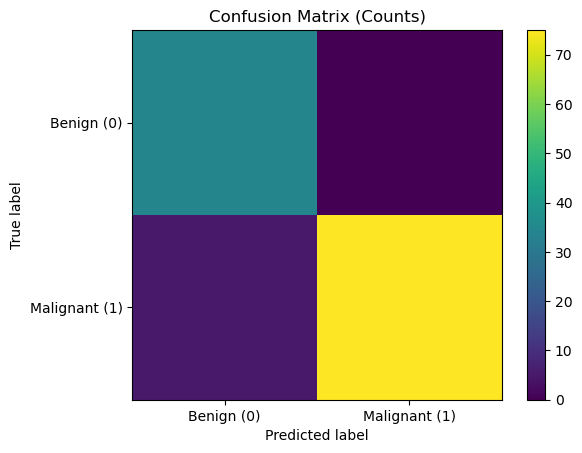

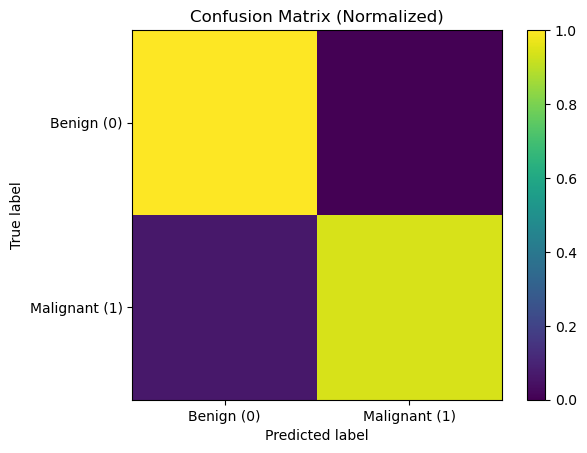

In [221]:
# 5.4 Confusion Matrices (counts + normalized)
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
cm_norm = confusion_matrix(y_test, y_pred, labels=[0, 1], normalize="true")

def plot_cm(mat, title):
    plt.figure()
    plt.imshow(mat, interpolation="nearest")
    plt.title(title)
    plt.colorbar()
    ticks = np.arange(2)
    plt.xticks(ticks, ["Benign (0)","Malignant (1)"])
    plt.yticks(ticks, ["Benign (0)","Malignant (1)"])
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.show()

plot_cm(cm, "Confusion Matrix (Counts)")
plot_cm(cm_norm, "Confusion Matrix (Normalized)")


### 5.5 Save predictions for your submission


In [223]:
# 5.5 Save full test predictions (optional, useful for submission/audit)
import pandas as pd

test_predictions = pd.DataFrame({
    "y_true": y_test.reset_index(drop=True),
    "y_pred": pd.Series(y_pred).reset_index(drop=True)
})
test_predictions.to_csv("test_predictions.csv", index=False)
print("Saved: test_predictions.csv")


Saved: test_predictions.csv


- We applied the exact winning pipeline from Part 4 to the held-out test set and reported F1 on the malignant class to match the CV metric.

- We show the first 5 predictions, a classification report, and confusion matrices (counts & normalized) to illustrate performance and error types.


### 5.6 Visualizing predictions



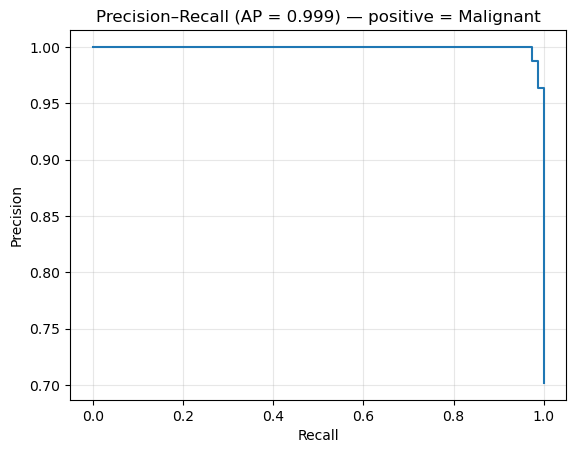

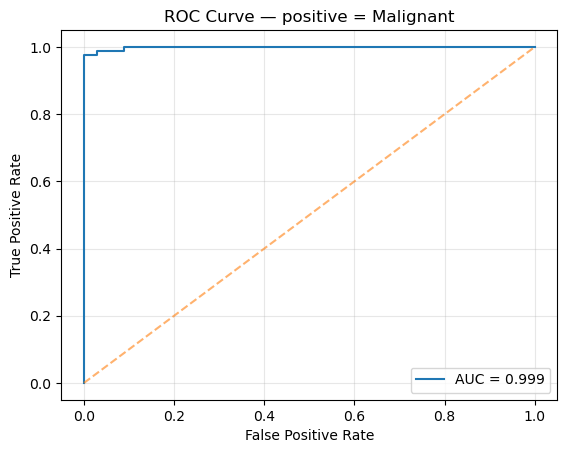

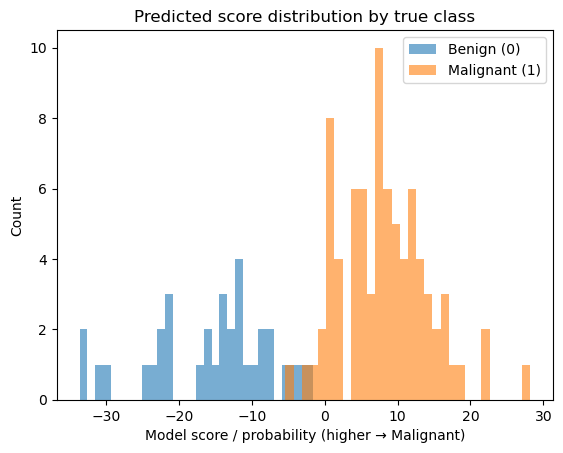

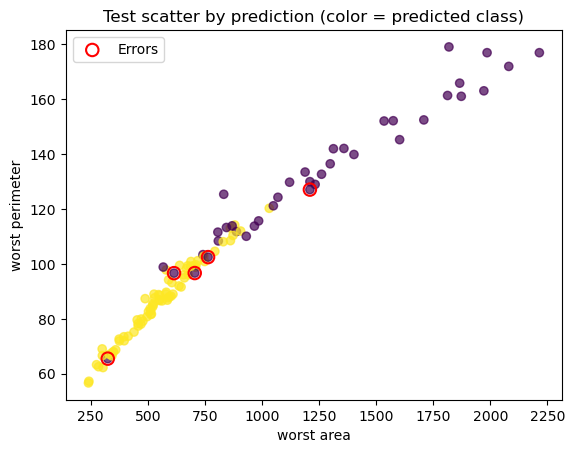

In [226]:
# 5.6 Visualizing predictions — PR/ROC/Score distributions (+ optional 2D scatter)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import (
    precision_recall_curve, average_precision_score,
    roc_curve, roc_auc_score
)

def get_scores(estimator, X):
    """Return continuous scores for the positive class (Malignant=1) for PR/ROC plots."""
    if hasattr(estimator, "decision_function"):
        s = estimator.decision_function(X)
        # decision_function may return shape (n_samples,) or (n_samples, 2)
        if s.ndim == 2 and s.shape[1] == 2:
            s = s[:, 1]
        return s
    if hasattr(estimator, "predict_proba"):
        return estimator.predict_proba(X)[:, 1]
    return None

# Ensure we evaluate on the same columns used in training
X_test_eval = X_test.copy()
scores = get_scores(best_model, X_test_eval)

# 5.6.1 Precision–Recall curve (primary for F1-focused evaluation)
if scores is not None:
    p, r, _ = precision_recall_curve(y_test, scores, pos_label=1)
    ap = average_precision_score(y_test, scores, pos_label=1)

    plt.figure()
    plt.step(r, p, where="post")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(f"Precision–Recall (AP = {ap:.3f}) — positive = Malignant")
    plt.grid(True, alpha=0.3)
    plt.show()
else:
    print("Skipping PR curve: model does not expose decision_function/predict_proba.")

# 5.6.2 ROC curve
if scores is not None:
    fpr, tpr, _ = roc_curve(y_test, scores, pos_label=1)
    auc = roc_auc_score(y_test, scores)

    plt.figure()
    plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}")
    plt.plot([0,1], [0,1], linestyle="--", alpha=0.6)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve — positive = Malignant")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

# 5.6.3 Predicted score distributions by true class
if scores is not None:
    plt.figure()
    plt.hist(scores[y_test == 0], bins=30, alpha=0.6, label="Benign (0)")
    plt.hist(scores[y_test == 1], bins=30, alpha=0.6, label="Malignant (1)")
    plt.title("Predicted score distribution by true class")
    plt.xlabel("Model score / probability (higher → Malignant)")
    plt.ylabel("Count")
    plt.legend()
    plt.show()

# 5.6.4 (Optional) 2D scatter of test points using two informative features + error overlay
try:
    # Pick two informative features from train via mutual information
    from sklearn.feature_selection import mutual_info_classif
    mi = mutual_info_classif(X_train, y_train, random_state=42)
    idx = np.argsort(mi)[-2:]
    f1, f2 = X_train.columns[idx[0]], X_train.columns[idx[1]]
except Exception:
    # Fallback: just take the first two features
    feats = [c for c in X_train.columns[:2]]
    f1, f2 = feats[0], feats[1]

plt.figure()
scatter = plt.scatter(X_test[f1], X_test[f2], c=y_pred, alpha=0.7)
plt.xlabel(f1); plt.ylabel(f2)
plt.title("Test scatter by prediction (color = predicted class)")
# Overlay misclassified points
mist = (y_test.values != y_pred)
plt.scatter(X_test[f1][mist], X_test[f2][mist],
            facecolors="none", edgecolors="red", s=80, linewidths=1.5, label="Errors")
plt.legend()
plt.show()


- **PR curve**: assesses precision vs recall for the malignant class; complements F1 and is robust to class imbalance.

- **ROC curve**: shows TPR vs FPR; provides AUC for overall ranking quality.

- **Score distributions**: helps see separation between classes and whether a threshold tweak could reduce FN/FP.

- **2D scatter + errors**: gives intuition on where mistakes happen in feature space (with two informative features).



## 5.7 Conclusion
The best pipeline: StandardScaler + LogisticRegression (liblinear, C=10) - achieved 0.9838 CV F1 (Malignant) and 0.9677 Test F1, indicating strong generalization without needing feature selection.


## Reproducibility & Environment

In [230]:
import platform, sys, sklearn, pandas as pd, numpy as np, matplotlib, scipy, joblib, threadpoolctl
print("Python:", sys.version)
print("Platform:", platform.platform())
print("sklearn:", sklearn.__version__)
print("pandas:", pd.__version__)
print("numpy:", np.__version__)
print("scipy:", scipy.__version__)
print("matplotlib:", matplotlib.__version__)
print("joblib:", joblib.__version__)
print("threadpoolctl:", threadpoolctl.__version__)

# Full dependency report (very useful in submissions)
sklearn.show_versions()


Python: 3.12.7 | packaged by Anaconda, Inc. | (main, Oct  4 2024, 13:17:27) [MSC v.1929 64 bit (AMD64)]
Platform: Windows-11-10.0.22631-SP0
sklearn: 1.5.1
pandas: 2.2.2
numpy: 1.26.4
scipy: 1.13.1
matplotlib: 3.9.2
joblib: 1.4.2
threadpoolctl: 3.5.0

System:
    python: 3.12.7 | packaged by Anaconda, Inc. | (main, Oct  4 2024, 13:17:27) [MSC v.1929 64 bit (AMD64)]
executable: C:\Users\ekisy\anaconda3\python.exe
   machine: Windows-11-10.0.22631-SP0

Python dependencies:
      sklearn: 1.5.1
          pip: 24.2
   setuptools: 75.1.0
        numpy: 1.26.4
        scipy: 1.13.1
       Cython: None
       pandas: 2.2.2
   matplotlib: 3.9.2
       joblib: 1.4.2
threadpoolctl: 3.5.0

Built with OpenMP: True

threadpoolctl info:
       user_api: blas
   internal_api: mkl
    num_threads: 8
         prefix: mkl_rt
       filepath: C:\Users\ekisy\anaconda3\Library\bin\mkl_rt.2.dll
        version: 2023.1-Product
threading_layer: intel

       user_api: openmp
   internal_api: openmp
    num_thr